# 03 머신러닝의 기초를 다집니다



### 03-1 선형 회귀에 대해 알아보고 데이터를 준비합니다

y = ax + b <br>
머신러닝에서는 x, y가 주어질 때 기울기(a)와 절편(b)를 구한다.<br>
x : 입력 , y : 타깃

---

**문제 해결을 위해 당뇨병 환자의 데이터 준비하기**<br/>
당뇨병 환자의 1년 후 병의 진전된 정도를 예측하는 모델을 만들기

1. load_diabetes() 함수로 당뇨병 데이터 준비하기

In [1]:
# 사이킷런의 datasets 모듈의 load_diabetes()함수 임포트
from sklearn.datasets import load_diabetes
diabetes = load_diabetes() #diabetes에 당뇨병 데이터 저장

2. 입력과 타깃 데이터의 크기 확인하기

In [2]:
#입력 데이터와 타깃 데이터의 크기 확인
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


--> data : 442x10 크기 2차원 배열 <br>
여기서 행은 sample(당뇨병 환자에 대한 특성으로 이루어진 데이터 한세트), 열은 feature (당뇨병 데이터의 여러 특징)<br><br>
--> target : 442개 요소를 가진 1차원 배열<br><br>

3. 입력 데이터 자세히 보기


In [3]:
#앞부분 샘플 3개만 출력
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

--> 안쪽 대괄호 : 특성 값 10개 나열<br>
--> 3개의 샘플 추출 했으므로 3x10 크기의 배열

4. 타깃 데이터 자세히 보기

In [4]:
diabetes.data[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

--> 타깃 데이터는 10개의 요소로 구성된 샘플 1개에 대응 (당장은 이 수치가 무엇을 의미하는지 몰라도 됨)

**당뇨병 환자 데이터 시각화하기**

1. 맷플롯립의 scatter()함수로 산점도 그리기

In [5]:
import matplotlib.pyplot as plt

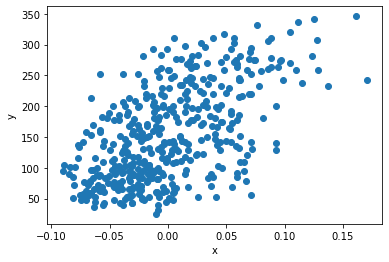

In [6]:
#10개의 특성을 모두 그래프로 표현하기 어려우므로 세번째 특성과 타깃 데이터로 산점도 그리기
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
#데이터의 세번째 특성(입력데이터)을 미리 분리하여 변수 x에 저장하고 타깃 데이터는 변수 y에 저장
x = diabetes.data[:, 2]
y = diabetes.target 

Q. 슬라이싱을 사용해 훈련 데이터 x에서 100번째 부터 109번째 까지 샘플을 출력해 보세요. 슬라이싱한 배열의 크기는 얼마인가요?

In [8]:
x_sample = x[99:109]
print(x_sample, x_sample.shape)

[-0.06440781  0.01750591 -0.04500719  0.02828403  0.04121778  0.06492964
 -0.03207344 -0.07626374  0.04984027  0.04552903] (10,)


---
<br> 

### 03-2 경사 하강법으로 학습하는 방법을 알아봅니다

**선형 회귀와 경사 하강법의 관계**

- **선형 회귀의 목표** : 입력 데이터(x)와 타깃 데이터(y)를 통해 기울기(a)와 절편(b)를 찾는 것. 즉, 산점도 그래프를 잘 표현하는 직선의 방정식을 찾는 것
- **경사 하강법 (gradient descent)** : 모델이 데이터를 잘 표현할 수 있도록 기울기(변화율)를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘

**예측값**<br>
- 입력과 출력 데이터 (x,y)를 통해 규칙(a,b)를 발견하면 모델을 만들었다고 한다. 그 모델에 대해 새로운 입력값을 넣었을 때 나오는 출력이 예측값(y_hat)이다.<br>
- y_hat = wx + b
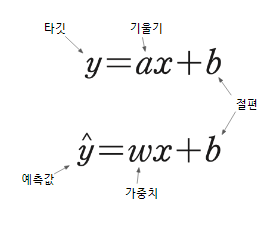

**예측값으로 올바른 모델 찾기**<br>
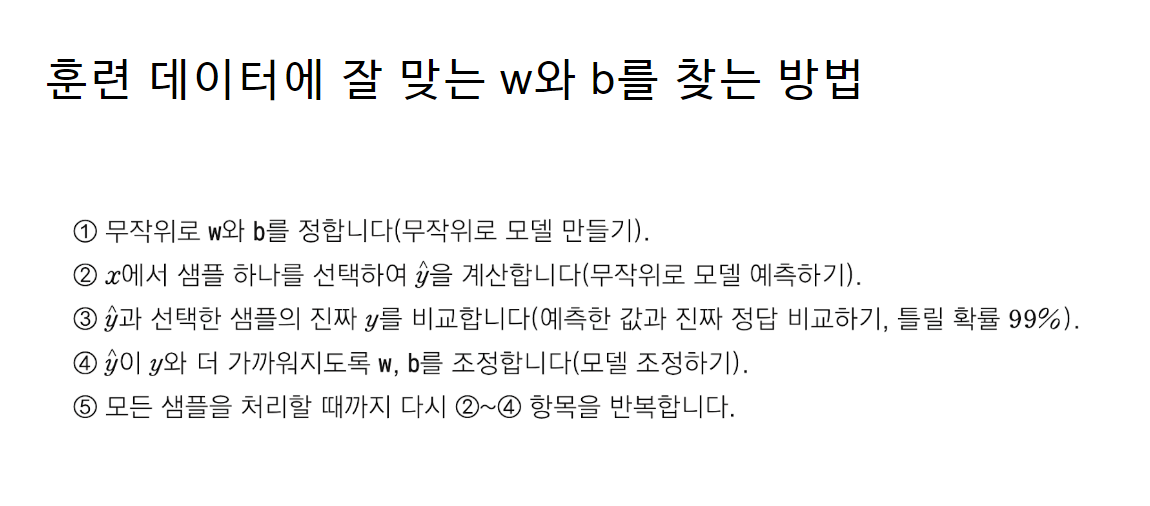

1. w와 b 초기화하기

In [9]:
w = 1.0
b = 1.0

2. 훈련 데이터의 첫 번째 샘플 데이터로 y_hat 얻기

In [10]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


3. 타깃과 예측 데이터 비교하기

In [11]:
print(y[0])

151.0


--> 예측 데이터인 1.06과 타깃 151은 차이가 많이 나는 것을 알 수 있음

4. w값 조절해 예측값 바꾸기

In [12]:
#w와 b를 조금씩 변경해서 y_hat이 증가하는지 또는 감소하는지 살펴보기
#먼저 w를 0.1만큼 증가시키고 y_hat 변화량 관찰해보기
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


5. w값 조정한 후 예측값 증가 정도 확인하기

In [13]:
#w가 0.1만큼 증가했을때 y_hat이 얼마나 증가했을까?
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


--> x[0]에 대한 w의 변화율 w_rate<br>
※ w_rate = x[0]

**변화율로 가중치 업데이트하기**<br>
변화율이 양수, 음수일때 모두 같은 방법

In [14]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


**변화율로 절편 업데이트하기**

In [15]:
#절편 b에 대한 변화율을 구한 다음 b를 업데이트
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186887


In [16]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


--> 변화율의 값이 1 : 즉 b가 1만큼 증가하면 y_hat도 1만큼 증가

In [17]:
#b를 업데이트하기 위해서는 변화율이 1이므로 단순히 1 더하면 됨
b_new = b + 1
print(b_new)

2.0


**오차 역전파로 가중치와 절편을 더 적절하게 업데이트합니다**

1. 오차와 변화율을 곱하여 가중치 업데이트하기


In [18]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)
# w와 b가 큰 폭으로 바뀌었음

10.250624555904514 150.9383037934813


2. 두번째 샘플 x[1]을 사용하여 오차 구하고 새로운 w와 b구하기

In [19]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1] #별도로 계산하지 않고 샘플값 그대로 사용
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


--> w는 4만큼 커지고 b는 절반으로 줄어들었다(150->75). 이런 방식으로 모든 샘플을 사용해 가중치와 절편을 업데이트한다.

3. 전체 샘플을 반복하기

In [20]:
for x_i, y_i in zip(x, y): #입력 x와 타깃 y배열에서 요소를 하나씩 꺼내어
    y_hat = x_i * w + b 
    err = y_i - y_hat  #err를 계산하고
    w_rate = x_i
    w = w + w_rate * err  #w와
    b = b + 1 * err  #b를 업데이트
print(w, b)

587.8654539985689 99.40935564531424


4. 과정 3을 통해 얻어낸 모델 그래프로 표현하기

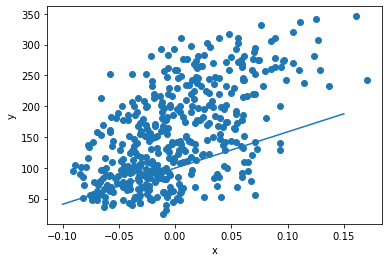

In [21]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

5. 여러 에포크를 반복하기 <br>
- 에포크(epoch) : 전체 훈련 데이터를 모두 이용하여 한 단위의 작업을 진행하는 것. 수십에서 수천 번의 에포크를 반복하면 조금 더 그럴싸한 직선을 얻을 수 있음.

In [22]:
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


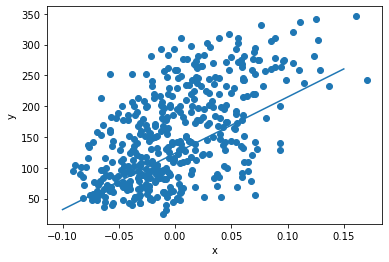

In [23]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

--> 경사 하강법으로 찾은 선형 회귀 모델
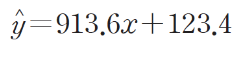

6. 모델로 예측하기

In [24]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


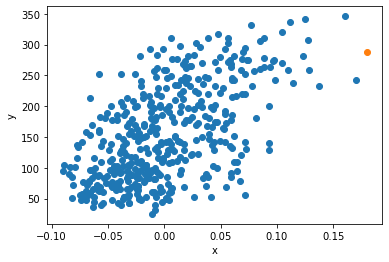

In [25]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()